In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc 

from collections import Counter
#from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.model_delection import ParameterGrid
from sklearn.datasets import load_iris
from sklearn import metrics


In [39]:
df= pd.read_csv("results/Requant/FeatureMatrix.tsv", sep="\t")
df= df.drop(columns="charge")
df.columns= [col.replace( r'MDNAWGS', 'MDNA_WGS_') for col in df.columns]
df= df.sort_index(axis=1)
df.columns = df.columns.str.replace(r'_Plate-\d', '')
df= df.astype(float)
cols= df.columns

#df[cols] = df[cols].replace({0:np.nan})
df= df.drop(columns="RT")
df= df.set_index("mz")
df

/var/folders/c_/ysz9v_bd1yb7h3ymmkn6m199jbv7x7/T/ipykernel_17975/2394973361.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'_Plate-\d', '')


,DNPM_MDNA_WGS_14_blank,DNPM_MDNA_WGS_14_rep1,DNPM_MDNA_WGS_14_rep2,DNPM_MDNA_WGS_14_rep3,FPY12_MDNA_WGS_14_blank,FPY12_MDNA_WGS_14_rep1,FPY12_MDNA_WGS_14_rep2,FPY12_MDNA_WGS_14_rep3,ISP2_MDNA_WGS_14_blank,ISP2_MDNA_WGS_14_rep1,ISP2_MDNA_WGS_14_rep2,ISP2_MDNA_WGS_14_rep3
mz,,,,,,,,,,,,
489.25494,652974.2,256839.50,151520.20,79780.14,36973.93,628200.2,339779.6,247363.30,156607.50,130316.80,83421.75,138740.0000
396.18720,191643.6,86121.01,158938.70,118689.00,210583.50,650682.9,902076.1,1102605.00,79279.17,32975.19,26509.98,46461.7000
359.23950,2042334.0,38741.71,10947.06,13384.05,36551.81,187921.5,117213.5,180031.00,189583.80,59839.03,40146.67,34080.9500
308.17114,2365180.0,2259782.00,1784322.00,1825069.00,67544.91,412922.4,45230.8,63598.06,561391.30,373302.30,315790.40,306980.4000
239.13843,123069.0,913240.10,786868.00,752350.00,1438382.00,152461.8,234744.9,405019.70,1170589.00,729176.80,671625.10,642311.7000
...,...,...,...,...,...,...,...,...,...,...,...,...
729.37490,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5291.9917
641.36120,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5563.9210
684.33820,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,4165.5845


In [40]:
# Load data, here an X matrix that has individual flowers as rows and different attributes as columns)
#data = load_iris()

# Make a pandas dataframe out of the data
#df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,DNPM_MDNA_WGS_14_blank,DNPM_MDNA_WGS_14_rep1,DNPM_MDNA_WGS_14_rep2,DNPM_MDNA_WGS_14_rep3,FPY12_MDNA_WGS_14_blank,FPY12_MDNA_WGS_14_rep1,FPY12_MDNA_WGS_14_rep2,FPY12_MDNA_WGS_14_rep3,ISP2_MDNA_WGS_14_blank,ISP2_MDNA_WGS_14_rep1,ISP2_MDNA_WGS_14_rep2,ISP2_MDNA_WGS_14_rep3
mz,,,,,,,,,,,,
489.25494,652974.2,256839.50,151520.20,79780.14,36973.93,628200.2,339779.6,247363.30,156607.50,130316.80,83421.75,138740.00
396.18720,191643.6,86121.01,158938.70,118689.00,210583.50,650682.9,902076.1,1102605.00,79279.17,32975.19,26509.98,46461.70
359.23950,2042334.0,38741.71,10947.06,13384.05,36551.81,187921.5,117213.5,180031.00,189583.80,59839.03,40146.67,34080.95
308.17114,2365180.0,2259782.00,1784322.00,1825069.00,67544.91,412922.4,45230.8,63598.06,561391.30,373302.30,315790.40,306980.40
239.13843,123069.0,913240.10,786868.00,752350.00,1438382.00,152461.8,234744.9,405019.70,1170589.00,729176.80,671625.10,642311.70


In [41]:
df.skew(axis=0, skipna = True) #explore if you have outliers - run unbiasted skew on any axis (axis= 0 : run skew on index rows per sample name aka the average normalised intensity of each sample)

DNPM_MDNA_WGS_14_blank     75.034809
DNPM_MDNA_WGS_14_rep1      82.639430
DNPM_MDNA_WGS_14_rep2      86.480268
DNPM_MDNA_WGS_14_rep3      87.208367
FPY12_MDNA_WGS_14_blank    15.774211
FPY12_MDNA_WGS_14_rep1     16.991515
FPY12_MDNA_WGS_14_rep2     45.244554
FPY12_MDNA_WGS_14_rep3     24.379106
ISP2_MDNA_WGS_14_blank     49.403632
ISP2_MDNA_WGS_14_rep1      46.920081
ISP2_MDNA_WGS_14_rep2      53.000667
ISP2_MDNA_WGS_14_rep3      49.230173
dtype: float64

In [42]:
df.describe()

,DNPM_MDNA_WGS_14_blank,DNPM_MDNA_WGS_14_rep1,DNPM_MDNA_WGS_14_rep2,DNPM_MDNA_WGS_14_rep3,FPY12_MDNA_WGS_14_blank,FPY12_MDNA_WGS_14_rep1,FPY12_MDNA_WGS_14_rep2,FPY12_MDNA_WGS_14_rep3,ISP2_MDNA_WGS_14_blank,ISP2_MDNA_WGS_14_rep1,ISP2_MDNA_WGS_14_rep2,ISP2_MDNA_WGS_14_rep3
count,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03,9.123000e+03
mean,1.198776e+06,9.823764e+05,6.568216e+05,7.547868e+05,1.178882e+06,1.041332e+06,2.118622e+06,1.587144e+06,7.353668e+05,1.287453e+06,1.130331e+06,1.075210e+06
std,1.792118e+07,3.232784e+07,2.053250e+07,2.572313e+07,7.680643e+06,4.963619e+06,2.388157e+07,9.065143e+06,7.490250e+06,3.356991e+07,3.103009e+07,2.814521e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.973949e+04,0.000000e+00,7.151521e+03,0.000000e+00,2.131688e+04,8.879422e+04,1.403297e+05,1.400823e+05,2.169938e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.509033e+05,6.039549e+04,6.578926e+04,5.123210e+04,2.481489e+05,5.994177e+05,8.484292e+05,8.888396e+05,1.879579e+05,4.157326e+04,4.005133e+04,3.256508e+04
max,1.565713e+09,2.929028e+09,1.893242e+09,2.379447e+09,2.337832e+08,1.669832e+08,1.578111e+09,4.090080e+08,5.436106e+08,1.976755e+09,2.066420e+09,1.757178e+09


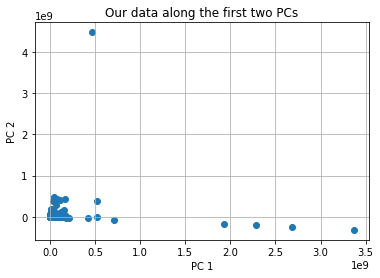

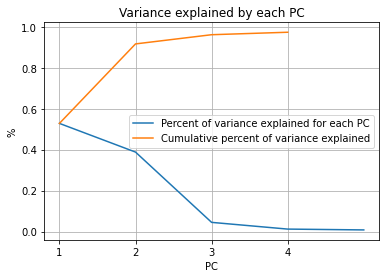

In [75]:
# So, as you know, the principle components of the data are the
# dimensions along which the data varies the most. The data
# here is 4 dimensional (since there are 4 features) and thus
# there are 4 total principle components.

# The first principle component will be the line along which the
# data varies the most. The second will be the line along with the
# data varies the second monst, and so on. The sum of the variances
# of all the principle components will be the entire variance of the
# dataset.

# Okay, so let's use the PCA function to get all 4 principle components.

# As always with the sklearn package, we first have to create and save
# a function "object":
pca = PCA(n_components=5)

# We can actually use this function object to get the first 4 principle
# components of any data. Let's do it for our data:
data_pca = pca.fit_transform(df)

# Now that we've called fit_transform, the pca object some attributes
# that includes the data points transformed along the principle components.
# So let's plot the data points along the first two principle components.
# We'll use the matplotlib.pyplot package to do this:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Our data along the first two PCs")
plt.grid(True)
plt.show()

# The explained variance is also included in the pca object.
# So we can plot that as well:
plt.plot(pca.explained_variance_ratio_,
        label="Percent of variance explained for each PC")
plt.plot([sum(pca.explained_variance_ratio_[:i]) for i in range(1, 5)],
        label="Cumulative percent of variance explained")
plt.legend()
plt.grid(True)
plt.xticks(range(4), ["%0.0f" % i for i in range(1, 5)])
plt.ylabel("%")
plt.xlabel("PC")
plt.title("Variance explained by each PC")
plt.show()

#make a plot where you zoom in
#volcano plots
# So now we see empirical evidence that the sum of all 4 variances
# equals the total variance in the data set (shown by the orange line) :)

In [26]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1

In [30]:
outlier_idx_1= df[df<(Q1-1.5*IQR)].index
outlier_idx_2= df[df>(Q3+1.5*IQR)].index
print(outlier_idx_1)
print(outlier_idx_2)

#### Interactive plots PCA

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as tls

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [98]:
df= pd.read_csv("results/Requant/FeatureMatrix.tsv", sep="\t")
df= df.drop(columns="charge")
df.columns= [col.replace( r'MDNAWGS', 'MDNA_WGS_') for col in df.columns]
df= df.sort_index(axis=1)
df.columns = df.columns.str.replace(r'_Plate-\d', '')
df= df.astype(float)
cols= df.columns

#df[cols] = df[cols].replace({0:np.nan})
df= df.drop(columns="RT")
target= df["mz"]
df =df.drop(columns="mz")
df

/var/folders/c_/ysz9v_bd1yb7h3ymmkn6m199jbv7x7/T/ipykernel_37380/366739517.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,DNPM_MDNA_WGS_14_blank,DNPM_MDNA_WGS_14_rep1,DNPM_MDNA_WGS_14_rep2,DNPM_MDNA_WGS_14_rep3,FPY12_MDNA_WGS_14_blank,FPY12_MDNA_WGS_14_rep1,FPY12_MDNA_WGS_14_rep2,FPY12_MDNA_WGS_14_rep3,ISP2_MDNA_WGS_14_blank,ISP2_MDNA_WGS_14_rep1,ISP2_MDNA_WGS_14_rep2,ISP2_MDNA_WGS_14_rep3
0,652974.2,256839.50,151520.20,79780.14,36973.93,628200.2,339779.6,247363.30,156607.50,130316.80,83421.75,138740.0000
1,191643.6,86121.01,158938.70,118689.00,210583.50,650682.9,902076.1,1102605.00,79279.17,32975.19,26509.98,46461.7000
2,2042334.0,38741.71,10947.06,13384.05,36551.81,187921.5,117213.5,180031.00,189583.80,59839.03,40146.67,34080.9500
3,2365180.0,2259782.00,1784322.00,1825069.00,67544.91,412922.4,45230.8,63598.06,561391.30,373302.30,315790.40,306980.4000
4,123069.0,913240.10,786868.00,752350.00,1438382.00,152461.8,234744.9,405019.70,1170589.00,729176.80,671625.10,642311.7000
...,...,...,...,...,...,...,...,...,...,...,...,...
9118,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5291.9917
9119,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5563.9210
9120,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,4165.5845
9121,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,6572.3530


In [101]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = df.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [102]:
trace1 = go.Scatter(
    x=list(range(12)),
    y= cum_var_exp,
    mode='lines+markers',
    hoverinfo= "all",
    name="'Cumulative Explained Variance'",
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(12)),
    y= var_exp,
    hoverinfo= "all",
    mode='lines+markers',
    name="'Individual Explained Variance'",
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.xaxis = dict(range=[0, 13])
fig.layout.yaxis = dict(range=[0, 110])

py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [104]:

X= df.values

# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 50 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = target

In [107]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = "Target",
    hoveron = 'points+fills',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'PCA (Principal Component Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')